In [1]:
using LaTeXStrings
using Plots

In [2]:
# Assume Omega is a set of integers from 1 to 10
Ω = Set(1:10)

# Assume S_alpha is a subset containing even numbers from 1 to 10
Sα = Set(2:2:10)

# Compute Omega \ S_alpha, which is the set of elements in Omega that are not in S_alpha
Ω\Sα = setdiff(Ω, Sα)
# Omega_minus_S_alpha = setdiff(Omega, S_alpha)

println(L"$\Omega$:", Ω)
println(L"$S_\alpha$: ", Sα)
println("Omega \\ S_alpha: ", Ω\Sα)


$\Omega$:Set([5, 4, 6, 7, 2, 10, 9, 8, 3, 1])
$S_\alpha$: Set([4, 6, 2, 10, 8])
Omega \ S_alpha: Set([5, 7, 9, 3, 1])


```julia
using Pkg
Pkg.add("Plots")
Pkg.add("LaTeXStrings")
```

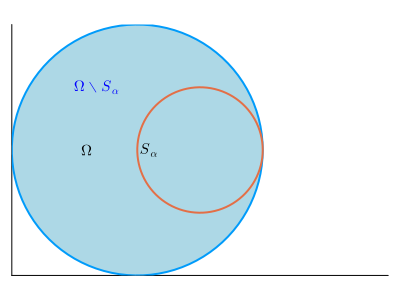

In [3]:
# Function to draw a circle
function draw_circle(center, radius, label=L""
        # , position # =:center
    )
    θ = LinRange(0, 2*π, 100)
    x = center[1] .+ radius * cos.(θ)
    y = center[2] .+ radius * sin.(θ)
    plot!(x, y, fill=(0, :lightblue), label="", linewidth=2)
    annotate!(center[1]-0.8, center[2]
        , text(label, 10
            # , position
            , :center
            , :black)
    )
end

# Initialize plot with specific size and no legends
plot(size=(400, 300), legend=false, xlim=(-2, 4), ylim=(-2, 2), aspect_ratio=:equal, xlabel="", ylabel="")

# Draw circles for Omega and S_alpha using LaTeXStrings
draw_circle([0, 0], 2.0, L"\Omega")
draw_circle([1, 0], 1, L"S_{\alpha}")

# Annotate regions using LaTeXStrings
annotate!(-1, 1, text(L"\Omega \setminus S_{\alpha}", 10, :left, :blue))

# Hide axis
plot!(xticks=[], yticks=[])

# Display the plot
plot!()


The probability distribution of a test statistic is the theoretical distribution of the statistic's possible values under the null hypothesis in hypothesis testing. It allows for calculating the likelihood of observing a test statistic as extreme as, or more extreme than, the observed value, assuming the null hypothesis is true. This distribution is used to:

- Determine **p-values**, comparing them to a significance level (\(\alpha\)) to decide on rejecting the null hypothesis.
- Identify **critical values** for decision boundaries in hypothesis testing.
- Evaluate the risks of **Type I and Type II errors**—incorrectly rejecting a true null hypothesis or failing to reject a false one, respectively.

The form of this distribution depends on the test (e.g., z-test, t-test) and influences decisions in statistical hypothesis testing by guiding the interpretation of empirical data in light of theoretical expectations.

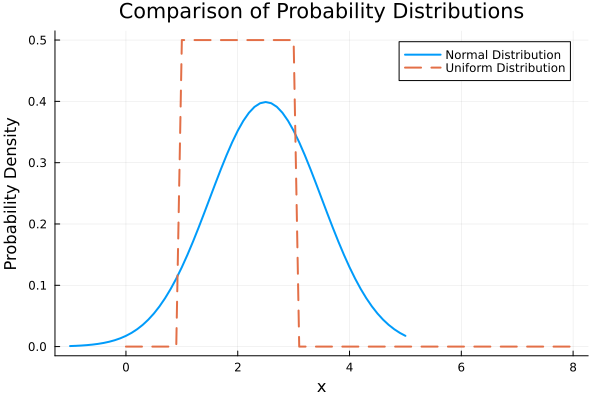

In [4]:
using Distributions

# Define the distributions
d𝒩 = Normal(2.5, 1)  # Mean 0, standard deviation 1
d𝒰 = Uniform(1,3)  # Rate parameter 1



# Generate data for plotting
x𝒩 = -1:0.1:5  # Range for normal distribution
x𝒰 = 0:0.1:8  # Range for exponential distribution, starting from 0
y𝒩 = pdf.(d𝒩, x𝒩)  # PDF values for normal distribution
y𝒰 = pdf.(d𝒰, x𝒰)  # PDF values for exponential distribution

# Plotting
plot(x𝒩, y𝒩, label="Normal Distribution", linewidth=2)
plot!(x𝒰, y𝒰, label="Uniform Distribution", linewidth=2, linestyle=:dash
    , xlabel = "x", ylabel = "Probability Density"
    , title = "Comparison of Probability Distributions"
)


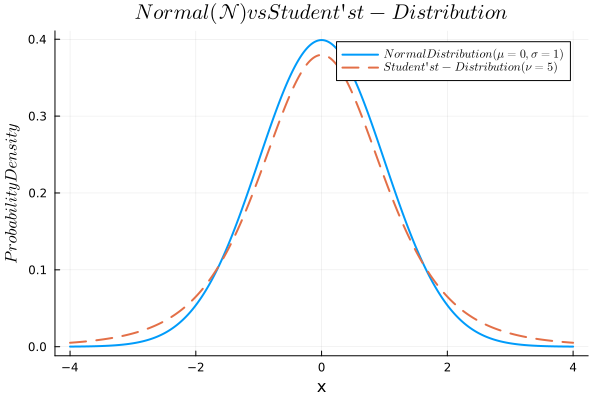

In [5]:
# Define the distributions with Greek notation for variables
μ = 0  # Mean of the Normal distribution
σ = 1  # Standard deviation of the Normal distribution
ν = 5  # Degrees of freedom for the Student's t-distribution

d𝒩 = Normal(μ, σ)  # Normal distribution
d𝙏 = TDist(ν)  # Student's t-distribution

# Generate points for plotting
xᵥ = -4:0.01:4
yν = pdf.(d𝒩, xᵥ)  # PDF values for the normal distribution
yt = pdf.(d𝙏, xᵥ)       # PDF values for the t-distribution

# Plotting
plot(xᵥ, yν
    , label=latexstring("Normal Distribution (\\mu = $μ, \\sigma = $σ)"), linewidth=2
)
plot!(xᵥ, yt
    , label=latexstring("Student's t-Distribution (\\nu = $ν)")
    , linewidth=2, linestyle=:dash
    , xlabel = "x", ylabel = latexstring("Probability Density")
    , title = latexstring("Normal (\\mathcal{N}) vs Student's t-Distribution")
)